In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
file_path = "/root/seele-slime/tool_statistics.json"

with open(file_path, "r") as f:
    statistics = json.load(f)
    


In [3]:
buckets = {
    "<1": [],
    "1-5": [],
    "5-10": [],
    "10-30": [],
    ">30": []
}

for data in statistics:
    time_used = data["time_used"]
    
    item = {
        "tool_name": data["tool_name"],
        "param": data["param"]
    }
    
    if time_used < 1:
        buckets["<1"].append(item)
    elif time_used < 5:
        buckets["1-5"].append(item)
    elif time_used < 10:
        buckets["5-10"].append(item)
    elif time_used < 30:
        buckets["10-30"].append(item)
    else:
        buckets[">30"].append(item)
        


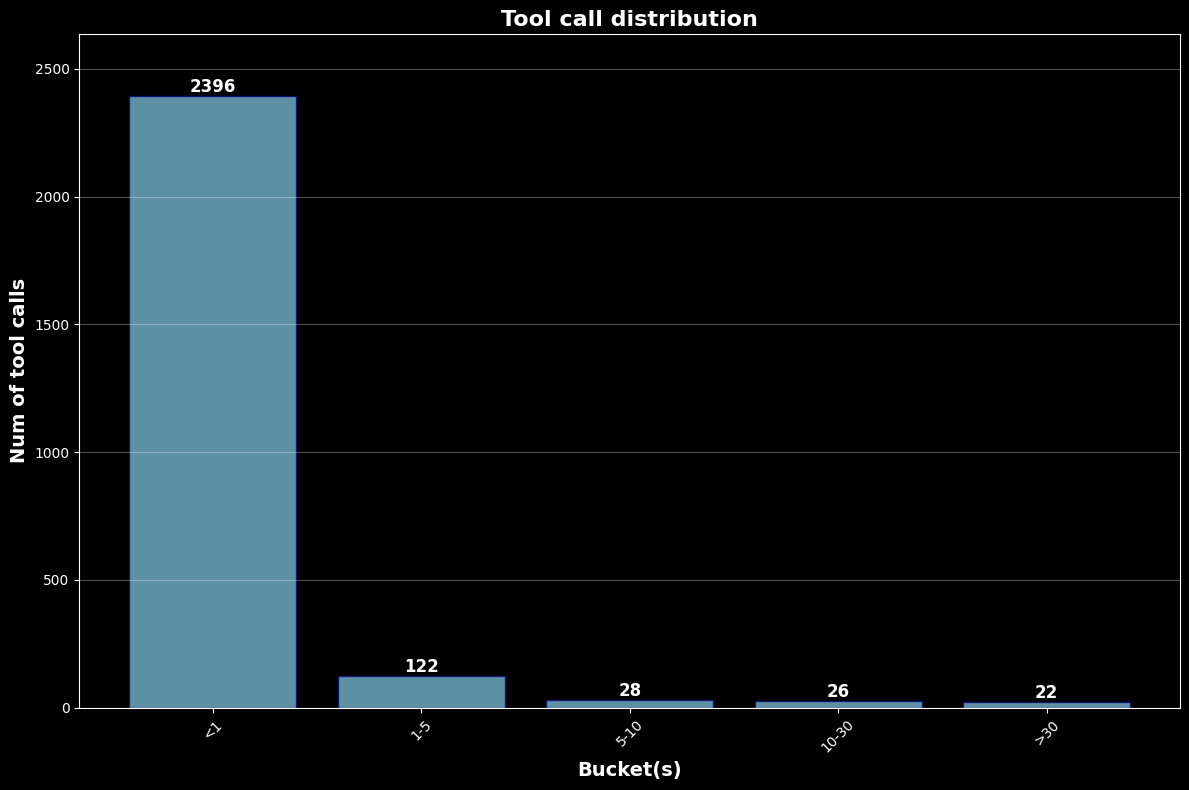

工具调用时间分布详情
1-5秒: 122次调用
  - BashTool: 89次
  - TestTool: 33次
5-10秒: 28次调用
  - TestTool: 16次
  - BashTool: 12次
10-30秒: 26次调用
  - BashTool: 16次
  - TestTool: 10次
>30秒: 22次调用
  - BashTool: 18次
  - TestTool: 4次
Total call: 198


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft Ya Hei', 'WenQuanYi Micro Hei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def visualize_time_distribution(buckets):
    """
    可视化时间分布图
    """
    # 准备数据
    labels = list(buckets.keys())
    counts = [len(buckets[label]) for label in labels]
    
    # 创建图形
    plt.figure(figsize=(12, 8))
    
    # 绘制柱状图
    bars = plt.bar(labels, counts, color='skyblue', edgecolor='navy', alpha=0.7)
    
    # 在柱子上方显示数量
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # 设置图表属性
    plt.xlabel('Bucket(s)', fontsize=14, fontweight='bold')
    plt.ylabel('Num of tool calls', fontsize=14, fontweight='bold')
    plt.title('Tool call distribution', fontsize=16, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # 设置y轴从0开始
    plt.ylim(0, max(counts) * 1.1 if max(counts) > 0 else 1)
    
    # 旋转x轴标签以防重叠
    plt.xticks(rotation=45)
    
    # 调整布局
    plt.tight_layout()
    
    # 显示图表
    plt.show()

def visualize_time_distribution_pie(buckets):
    """
    使用饼图可视化时间分布
    """
    # 准备数据
    labels = list(buckets.keys())
    counts = [len(buckets[label]) for label in labels]
    
    # 过滤掉数量为0的部分
    non_zero_labels = []
    non_zero_counts = []
    for label, count in zip(labels, counts):
        if count > 0:
            non_zero_labels.append(label)
            non_zero_counts.append(count)
    
    if not non_zero_counts:
        print("没有数据可显示")
        return
    
    # 创建饼图
    plt.figure(figsize=(10, 8))
    
    # 绘制饼图
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(non_zero_labels)))
    wedges, texts, autotexts = plt.pie(non_zero_counts, labels=non_zero_labels, autopct='%1.1f%%',
                                      colors=colors, startangle=90)
    
    # 美化百分比文本
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
    
    plt.title('Proportion', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def visualize_detailed_distribution(buckets):
    """
    显示详细的分布信息
    """
    print("=" * 50)
    print("工具调用时间分布详情")
    print("=" * 50)
    
    total_calls = 0
    for label, items in buckets.items():
        if label == "<1":
            continue
        count = len(items)
        total_calls += count
        print(f"{label}秒: {count}次调用")
        
        # 显示每个区间内的具体工具
        if count > 0:
            tool_counts = {}
            for item in items:
                tool_name = item["tool_name"]
                tool_counts[tool_name] = tool_counts.get(tool_name, 0) + 1
            
            for tool, tool_count in tool_counts.items():
                print(f"  - {tool}: {tool_count}次")
    
    print("=" * 50)
    print(f"Total call: {total_calls}")
    print("=" * 50)

# 使用示例
if __name__ == "__main__":
    # 假设buckets已经通过之前的代码填充了数据
    # buckets = categorize_time_usage(statistics)
    
    # 可视化柱状图
    visualize_time_distribution(buckets)
    
    # 可视化饼图
    # visualize_time_distribution_pie(buckets)
    
    # 显示详细分布信息
    visualize_detailed_distribution(buckets)

In [5]:
tools_1_5 = buckets["1-5"]

bash_tools = [raw for raw in tools_1_5 if raw["tool_name"] == "BashTool"]
bash_wo_pip = [raw for raw in bash_tools if "pip" not in raw["param"]["command"]]
bash_wo_pip = [raw for raw in bash_wo_pip if "apt-get" not in raw["param"]["command"]]
bash_wo_pip = [raw for raw in bash_wo_pip if "apt" not in raw["param"]["command"]]

for param in bash_wo_pip:
    print(param["param"]["command"])

python3 /app/convert_csv_to_parquet.py
python3 -c "import pandas as pd; df = pd.read_parquet('data/train-00000-of-00001.parquet'); print(df.head()); print(df.columns)"
python3 -m venv sudoku_env
sh -c "$(curl -fsSL https://raw.githubusercontent.com/ohmyzsh/ohmyzsh/master/tools/install.sh)" "" --unattended
wget -q --show-progress https://upc.lbl.gov/download/release/berkeley_upc-2022.10.0.tar.gz
git clone --depth 1 --branch 0.5.3 https://github.com/SPOCKnots/pyknotid.git /app/pyknotid && cd /app/pyknotid
cd /app/magsac/build && make -j$(nproc)
chmod +x /app/run-tests.sh && /app/run-tests.sh
chmod +x /app/run-tests.sh && /app/run-tests.sh
python3 -m venv /tmp/pgmpy_env
chmod +x /app/run-tests.sh && /app/run-tests.sh
qemu-system-i386 -m 128 -cdrom /app/isos/win311.img -vnc :1 -monitor stdio -k en-us -device usb-tablet -no-user-config -nodefaults -boot d -D qemu.log -usb -device usb-ehci -device usb-tablet &
python3 /app/audioproc.py
python3 /app/audioproc.py
python3 /app/audioproc.py
pyth